# 📘 Logistic Regression

## 🔥 Why Logistic Regression Exists?
- **Linear regression** predicts numbers (ex: house price = 3.5 Lakh).
- But some problems are **yes/no (classification)**:
  - Will student pass? (Yes/No)
  - Is email spam? (Yes/No)
  - Will patient survive? (Yes/No)

👉 We don’t need numbers like 7.2 or -3.5.  
👉 We need **probabilities (0 to 1)** → then convert to **Yes/No**.

---

## 🔥 What Logistic Regression Does
1. First, it calculates a line (like linear regression):
z = m * x + b

Example: (study_hours × m + b)

2. Instead of directly using `z`, it pushes it through a **sigmoid function**:
sigmoid(z) = 1 / (1 + e^(-z))

- This always bends results into the range **0 → 1**.

3. Then apply a **threshold**:
- If probability ≥ 0.5 → Predict **Yes (Pass)**
- If probability < 0.5 → Predict **No (Fail)**

---

## 🔥 Intuition with Example
- Student A studied 6 hours → sigmoid ≈ 0.9 → Model predicts **PASS ✅**
- Student B studied 2 hours → sigmoid ≈ 0.2 → Model predicts **FAIL ❌**

So logistic regression =  
👉 "Linear regression → squeeze result between 0–1 → classify Yes/No."

---

## 🔥 Visual Intuition
- X-axis = study hours
- Y-axis = probability of passing
- Curve is **S-shaped (sigmoid)**, not straight.
- At 0.5 cutoff → model decides Pass/Fail.

---

✅ **In one line**: Logistic Regression turns a straight line equation into a **probability curve (0–1)**, and then uses a cutoff (like 0.5) to make a classification.


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [36]:
data = {
    'hours_studied': [1, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10, 11, 12, 13, 14, 15, 16, 18, 20],
    'passed': [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
  }
df = pd.DataFrame(data)

X = df[['hours_studied']]
y = df['passed']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [39]:
# predict probabilities
y_prob = model.predict_proba(X_test)[:,1]

'''
- our dataset have 'passed': [0, 0, 1, 0, 1, 1] like this which belongs to y-axis
- so this is a binary classification problem with two possible outcomes, i.e. class 0: failed & class-1:passed
- When we train a Logistic Regression model, it learns to estimate the probability of each class.

- So for a new student (e.g., hours_studied = 2), the model says:
- “There’s a 5.2% chance they failed (class 0) and a 94.8% chance they passed (class 1).”
- that's how model calculates probability percentage for each class(clss 0 & 1)

- 👆here predict_proba() returns the probability that each sample belongs to each class.
- for binary classification, it returns a 2D array;
[[P(class=0), P(class=1)],
 [P(class=0), P(class=1)]]

- where each row have two columns one column for class-0 & another for class-1

e.g.:---
[[7.86073471e-01 2.13926529e-01]
 [5.16589453e-02 9.48341055e-01]
 [9.97622486e-01 2.37751372e-03]
 [7.07156760e-06 9.99992928e-01]
 [4.30972853e-01 5.69027147e-01]
 [6.84598062e-01 3.15401938e-01]]

- here in example output let's take 1st row [7.86073471e-01, 2.13926529e-01]  → [0.786, 0.214]
- i.e. 78.6% chance the student FAILED (class 0) & 21.4% chance the student PASSED (class 1)
- So %age of failure is more than 50%, i.e. final prediction (with threshold 0.5) → 0 (Fail)
- nd notice 7.86073471e-01 i.e. 7.86073471*10⁻¹ = 0.786073471 & 2.13926529e-01 i.e. 2.13926529*10⁻¹ = 0.213926529
- here  0.786073471 + 0.213926529 = 1 (always class:0 + class:1 = 1)

- But we only extract class-1
- so for that we used [:,1], which selects only the probability of class 1 (e.g. "Pass","Spam", "Yes" etc..), which is present in column-2 i.e. index-1 along axis-1
'''

# predict classes
y_pred = (y_prob >= 0.4).astype(int)
print(f"Real:\n{y_test}\nPrediction:\n{y_pred}\n")

Real:
8     1
16    1
0     0
24    1
11    1
9     0
Name: passed, dtype: int64
Prediction:
[0 1 0 1 1 0]



In [44]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
fs = f1_score(y_test, y_pred)

print(f"Accuracy: {acc}\nPrecission:{prec}\nRecall:{rec}\nF1-Score:{fs}\n")
print("Confusion Matrix:\n",cm)

Accuracy: 0.8333333333333334
Precission:1.0
Recall:0.75
F1-Score:0.8571428571428571

Confusion Matrix:
 [[2 0]
 [1 3]]


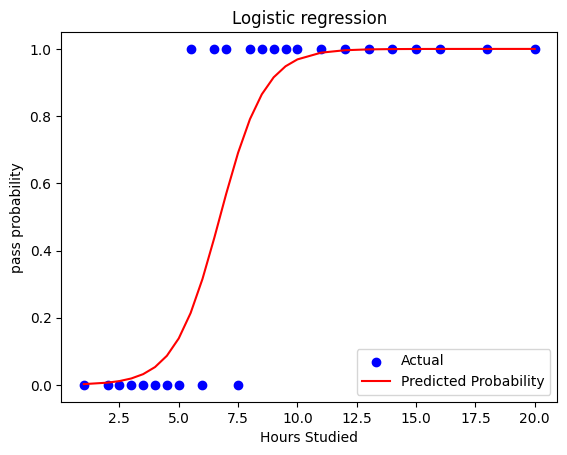

' \nhere i took X & y for creating plot, not X_test & y_predict, like in linear regression, cuz;\n\n- In linear regression, we use X_test and y_pred because the model directly predicts continuous outputs for the test dataset.\n- But Logistic regression predicts probabilities, which are non-linear and require the full range of X (i.e. the entire dataset not only test dataset) for visualization.\n- X_test(test dataset) is too limited for drawing probability plot and would result in an incomplete or jagged plot.\n'

In [41]:
# plotting
plt.scatter(X, y, color='blue', label="Actual")
plt.plot(X, model.predict_proba(X)[:,1], color='red', label='Predicted Probability')
plt.xlabel("Hours Studied")
plt.ylabel("pass probability")
plt.title("Logistic regression")
plt.legend()
plt.show()

''' 
here i took X & y for creating plot, not X_test & y_predict, like in linear regression, cuz;

- In linear regression, we use X_test and y_pred because the model directly predicts continuous outputs for the test dataset.
- But Logistic regression predicts probabilities, which are non-linear and require the full range of X (i.e. the entire dataset not only test dataset) for visualization.
- X_test(test dataset) is too limited for drawing probability plot and would result in an incomplete or jagged plot.
'''